# Black Friday Analysis and Prediction

**Dataset Overview**

Columns Names for train dataset: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1,Product_Category_2, Product_Category_3,Purchase

Data Pre-Processing:
* There are NaN values in Product_Category_2 and Product_Category_3
* Marital status can be 0 - Unmarried, 1 - Married
* City Category should be converted to numerical datatype, with dummy variables

* Age should be converted into a integer(now is a number range stored as strings)
* Gender convert binary
* Stay_In_Current_City: Handle 4+ Symbol
* Occupation: at least 16 values


***In order to access the visualisation of the data, please check visualisation file***

In [210]:
#Import libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


#Import Datasets

#This dataset was used for analysing the data and train the models
train = pd.read_csv('../data/train.csv') 
#This dataset is used to test the model and predict the sales on Black Friday
test = pd.read_csv('../data/test.csv')

In [211]:
#Descriptive statistics on train data
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [212]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [213]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

**Check for NaN values and fill them with 0, mean,  median or mode.**

In [214]:
#Check for null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

***Note: There are null values in Product Category 2 & 3***. In order to make not repeat the same code for cleaning the data we can join both csv files and then separate them

In [215]:
train['source'] = 'train'
test['source'] = 'test'

data = train

In [216]:
# #check null or missing values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
source                             0
dtype: int64

In [217]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(0).astype("float")
data["Product_Category_3"]= \
data["Product_Category_3"].fillna(0).astype("float")
data = data.fillna(0)

**Convert gender to binary**


In [218]:
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])

data["Gender"].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

**Giving Age Numerical values**

In [219]:
age_dict = {'0-17':8.5, '18-25':21.5, '26-35':30.5, '36-45':40.5, '46-50':48, '51-55':53, '55+':55}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts().sort_index()

8.5      15102
21.5     99660
30.5    219587
40.5    110013
48.0     45701
53.0     38501
55.0     21504
Name: Age, dtype: int64

**Giving City_Category Numerical values**

In [220]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])

data["City_Category"].value_counts().sort_index()

0    147720
1    231173
2    171175
Name: City_Category, dtype: int64

***Get rid off + in Stay_In_Current_City_Years***


In [221]:
# data = data.replace({'Stay_In_Current_City_Years': {'4+': 4}})
# data.head(5);

In [223]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
# data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,0,8.5,10,0,2,0,3,0.0,0.0,8370,train
1,1000001,P00248942,0,8.5,10,0,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,0,8.5,10,0,2,0,12,0.0,0.0,1422,train
3,1000001,P00085442,0,8.5,10,0,2,0,12,14.0,0.0,1057,train
4,1000002,P00285442,1,55.0,16,2,4,0,8,0.0,0.0,7969,train
5,1000003,P00193542,1,30.5,15,0,3,0,1,2.0,0.0,15227,train
6,1000004,P00184942,1,48.0,7,1,2,1,1,8.0,17.0,19215,train
7,1000004,P00346142,1,48.0,7,1,2,1,1,15.0,0.0,15854,train
8,1000004,P0097242,1,48.0,7,1,2,1,1,16.0,0.0,15686,train
9,1000005,P00274942,1,30.5,20,0,1,1,8,0.0,0.0,7871,train


**Divide into test and train and export as new files-modified**


In [225]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("../data/train_cleaned.csv",index=False)
test.to_csv("../data/test_cleaned.csv",index=False)

In [226]:
# #Import new modified data
train_df = pd.read_csv('../data/train_cleaned.csv')
test_df = pd.read_csv('../data/test_cleaned.csv')

***Machine Learning***
------

**Function used for modelfit algorithms.**
Define a generic function which takes the algorithm and data as input and makes the model, performs prediction, RMSE and accurance of eahc algorithm.


In [289]:

from sklearn import *
from sklearn.model_selection import train_test_split

target = train_df["Purchase"]
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])

x, y = data[predictors], target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)



def modelfit(alg, xtrain, ytrain, xtest, ytest):

    alg.fit(xtrain, ytrain)
        
#     #Predict training set:
    dtrain_predictions = alg.predict(xtrain)
    predicts_test = alg.predict(xtest)
    

#     #Accurance of the model
#     acc_alg = round(alg.score(xtrain, ytrain) * 100, 2)
#     print("Accurance: ",round(acc_alg,2,),"%")
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(ytrain, dtrain_predictions)))
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(ytest, predicts_test)))

    
    return np.sqrt(metrics.mean_squared_error(ytrain, dtrain_predictions))



In [308]:
def modelfitnn(alg, xtrain, ytrain, xtest, ytest):

    alg.fit(xtrain, ytrain, epochs= 80)
        
#     #Predict training set:
    dtrain_predictions = alg.predict(xtrain)
    predicts_test = alg.predict(xtest)
    

#     #Accurance of the model
#     acc_alg = round(alg.score(xtrain, ytrain) * 100, 2)
#     print("Accurance: ",round(acc_alg,2,),"%")
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(ytrain, dtrain_predictions)))
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(ytest, predicts_test)))

    
    return np.sqrt(metrics.mean_squared_error(ytrain, dtrain_predictions))



In [309]:
# Define model
nn = Sequential()
nn.add(Dense(100, input_dim = 9, activation= "relu"))
nn.add(Dense(100, activation= "relu"))
nn.add(Dense(100, activation= "relu"))
nn.add(Dense(200, activation= "relu"))
nn.add(Dense(100, activation= "relu"))
nn.add(Dense(100, activation= "relu"))
nn.add(Dense(100, activation= "relu"))

nn.add(Dense(1))
nn.summary() #Print model Summary

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 100)               1000      
_________________________________________________________________
dense_190 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_191 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_192 (Dense)            (None, 200)               20200     
_________________________________________________________________
dense_193 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_194 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_195 (Dense)            (None, 100)             

In [311]:
# Compile model
nn.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [307]:
rmse_nn = modelfitnn(nn, xtrain, ytrain, xtest, ytest)

Epoch 1/30
440054/440054 [==============================] - 49s 110us/step - loss: 16006156.9704 - mean_squared_error: 16006149.0000
Epoch 2/30
440054/440054 [==============================] - 49s 111us/step - loss: 10556029.3551 - mean_squared_error: 10556077.0000
Epoch 3/30
440054/440054 [==============================] - 49s 111us/step - loss: 10092955.6350 - mean_squared_error: 10092984.0000
Epoch 4/30
440054/440054 [==============================] - 49s 112us/step - loss: 9884411.6276 - mean_squared_error: 9884434.0000
Epoch 5/30
440054/440054 [==============================] - 49s 111us/step - loss: 10184809.8066 - mean_squared_error: 10184817.0000
Epoch 6/30
440054/440054 [==============================] - 48s 110us/step - loss: 9875583.9703 - mean_squared_error: 9875579.0000
Epoch 7/30
440054/440054 [==============================] - 49s 110us/step - loss: 9868692.7360 - mean_squared_error: 9868706.0000
Epoch 8/30
440054/440054 [==============================] - 49s 111us/step 

In [ ]:
rmse_nn = modelfitnn(nn, xtrain, ytrain, xtest, ytest)

Epoch 1/80
440054/440054 [==============================] - 22s 49us/step - loss: 18101933.9738 - mean_squared_error: 18101962.0000
Epoch 2/80
440054/440054 [==============================] - 20s 46us/step - loss: 11761507.7004 - mean_squared_error: 11761511.0000
Epoch 3/80
440054/440054 [==============================] - 20s 46us/step - loss: 10206063.8596 - mean_squared_error: 10206090.0000
Epoch 4/80
440054/440054 [==============================] - 23s 52us/step - loss: 9917949.3433 - mean_squared_error: 9917930.0000
Epoch 5/80
440054/440054 [==============================] - 23s 52us/step - loss: 9637066.6443 - mean_squared_error: 9637047.0000
Epoch 6/80
440054/440054 [==============================] - 19s 44us/step - loss: 9543224.9887 - mean_squared_error: 9543231.0000
Epoch 7/80
440054/440054 [==============================] - 21s 48us/step - loss: 9434283.6501 - mean_squared_error: 9434258.0000
Epoch 8/80
440054/440054 [==============================] - 22s 50us/step - loss: 94

In [275]:

#evaluate while fitting
# nn.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

***Liniar Regression***


Model Report
RMSE : 4627
RMSE : 4618


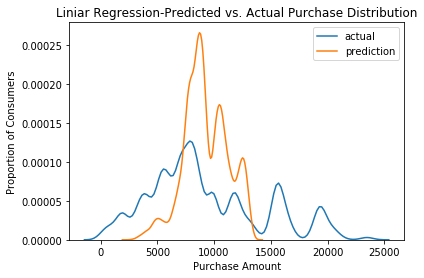

In [236]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(normalize=True)
acc_LR = modelfit(LR, xtrain, ytrain, xtest, ytest)

sns.distplot(ytest,bins = 20, hist = False, label = 'actual')
sns.distplot(LR.predict(xtest),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('Liniar Regression-Predicted vs. Actual Purchase Distribution')
plt.savefig('../Diagrams/PredictedvactualLR.png')
plt.show()

***Decision Tree Regressor***


Model Report
RMSE : 2898
RMSE : 2956


FileNotFoundError: [Errno 2] No such file or directory: 'Models train/PredictedvactualDT.png'

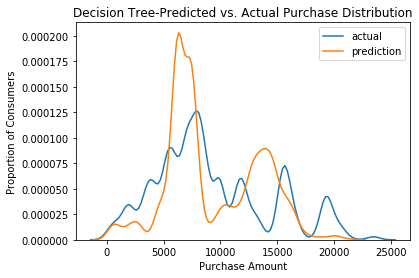

In [237]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
acc_DT = modelfit(DT, xtrain, ytrain, xtest,ytest)

sns.distplot(ytest,bins = 20, hist = False, label = 'actual')
sns.distplot(DT.predict(xtest),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('Decision Tree-Predicted vs. Actual Purchase Distribution')
plt.savefig('../Diagrams/PredictedvactualDT.png')
plt.show()

***Random Forest Regressor***

/Users/ana-maria/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accurance:  65.41 %

Model Report
RMSE : 2956


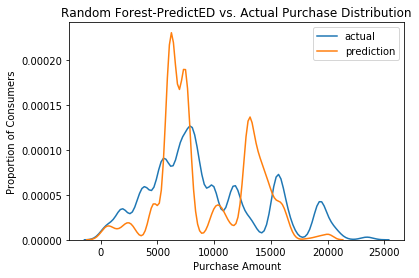

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=8, min_samples_leaf=150)
acc_RF = modelfit(rf, xtrain, ytrain, xtest,ytest);

sns.distplot(ytest,bins = 20, hist = False, label = 'actual')
sns.distplot(rf.predict(xtest),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('Random Forest-PredictED vs. Actual Purchase Distribution')
plt.savefig('../Diagrams/PredictedvactualRF.png')
plt.show()

**Feature Importance**
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [24]:
print(train.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4'],
      dtype='object')


In [25]:
print(rf.feature_importances_,3)

[2.00399707e-04 8.74243438e-04 6.71051073e-04 4.04401527e-03
 8.15625214e-05 9.77884512e-01 9.66872117e-03 6.24850048e-03
 3.25371426e-05 1.11869779e-04 1.65211372e-05 1.41510674e-04
 2.45553512e-05] 3


In [26]:
importances = pd.DataFrame({'feature':predictors,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [27]:
importances.head(12)


,importance
feature,
Product_Category_1,0.978
Product_Category_2,0.010
Product_Category_3,0.006
City_Category,0.004
Age,0.001
Occupation,0.001
Gender,0.000
Marital_Status,0.000
Stay_In_Current_City_Years_0,0.000


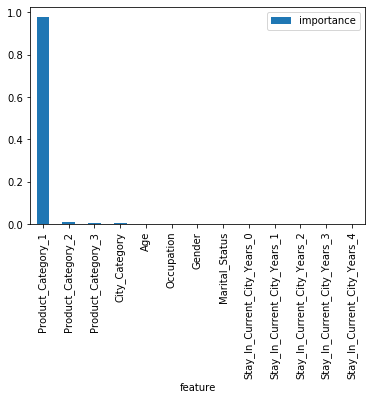

In [28]:
importances.plot.bar()


***Conclusion:***
Only Product categories and city category play a role in our random forest prediction process. 

***XGBoost***

/Users/ana-maria/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:43:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accurance:  69.05 %

Model Report
RMSE : 2796


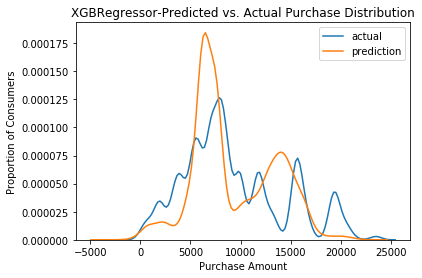

In [46]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBRegressor

xgbr = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
acc_XG = modelfit(xgbr, xtrain, ytrain, xtest,ytest);

sns.distplot(ytest,bins = 20, hist = False, label = 'actual')
sns.distplot(xgbr.predict(xtest),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('XGBRegressor-Predicted vs. Actual Purchase Distribution')
plt.savefig('../Diagrams/PredictedvactualXGRR.png')
plt.show()

***Feature importance XGBoost***

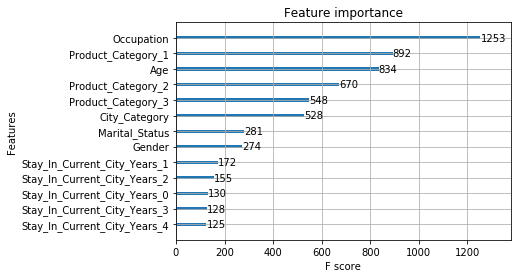

In [49]:
xgb.plot_importance(xgbr)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

From the diagram, we can conclude that ocupation and product category 1, are most important in the prediction. 

***ExtraTreeRegressor***

Accurance:  80.29 %

Model Report
RMSE : 2231


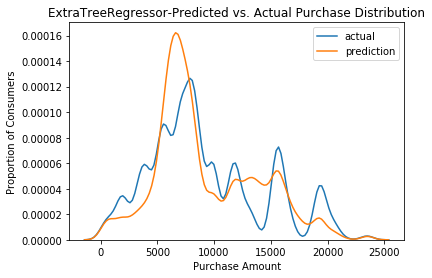

In [30]:
from sklearn.tree import ExtraTreeRegressor
# Define model. Specify a number for random_state to ensure same results each run
etr = ExtraTreeRegressor()

acc_EX = modelfit(etr, xtrain, ytrain, xtest,ytest);

sns.distplot(ytest,bins = 20, hist = False, label = 'actual')
sns.distplot(etr.predict(xtest),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('ExtraTreeRegressor-Predicted vs. Actual Purchase Distribution')
plt.savefig('../Diagrams/PredictedvactualETR.png')
plt.show()

**Feature importance based on ExtraTreeRegressor model**

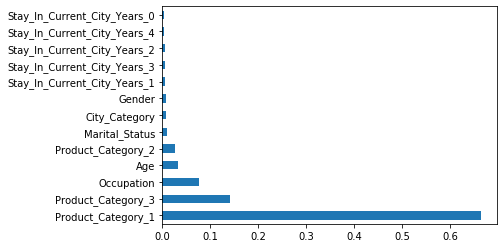

In [31]:
feature_importances = pd.Series(etr.feature_importances_, index=predictors)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

***Which is the best model?***

In [32]:
results = pd.DataFrame({
    'Model': [ 'Liniar Regression', 
              'Decision Tree','Random Forest',
              'XGBoost', 'ExtraTreeRegressor' ],
    'Score': [acc_LR, acc_DT, acc_RF, acc_XG, acc_EX]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                    Model
Score                    
80.29  ExtraTreeRegressor
69.05             XGBoost
66.75       Decision Tree
65.42       Random Forest
15.25   Liniar Regression


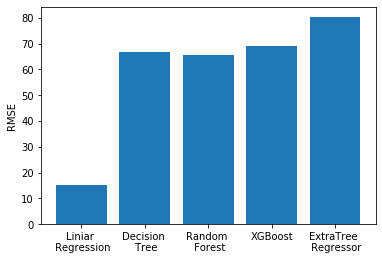

In [33]:
# Choose the height of the bars
height = [acc_LR, acc_DT, acc_RF, acc_XG, acc_EX]
 
# Choose the names of the bars
bars = ('Liniar \n Regression', 'Decision \n Tree','Random \n Forest', 'XGBoost','ExtraTree \n Regressor')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
plt.ylabel('RMSE')

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks()
plt.savefig('../Diagrams/CompareRMSE.png')

# Show graphic
plt.show()



In [34]:
#Submition of best model prediction

# submission = pd.DataFrame({
#         "User_ID": test_df["User_ID"],
#         "Purchase": y_prediction
#     })
# submission.to_csv('submission.csv', index=False)